In [212]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import pandas as pd
from Data_for_bp import data_gather_from_files,run_strategy_optimised,run_strategy_eval
import seaborn as sns
import time
import scipy
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [92]:
tick_data = data_gather_from_files('1 jan 2021','31 dec 2021')['EURUSD.mid']

## Scipy 

In [48]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize Realised profit 

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'SLSQP',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

In [49]:
print(' for scipy optimization with SLSQP, the optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)

 for scipy optimization with SLSQP, the optimal G and optimal_n is:  0.005 499993.4444819681 with profit -118030.5663


In [50]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize ProfitD

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'trust-constr',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


KeyboardInterrupt: 

In [ ]:
print(' for scipy optimization with trust-constr optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)


In [ ]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize ProfitD

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'COBYLA',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

In [ ]:
print(' for scipy optimization with COBYLA, the optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)

In [ ]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize realised profit

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'TNC',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

In [ ]:
print(' for scipy optimization with TNC, the optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)

cut

In [ ]:
from scipy.optimize import minimize

# Define the objective function
def objective(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return -R_PNL  # We negate the value since we want to maximize ProfitD

# Define the constraints
def constraint1(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return 10e6 - max_position

def constraint2(params, tick_data):
    G, n = params
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n)
    return U_PNL + 150e3

# Define bounds
bounds = [(0.001, 0.01), (100000, 2000000)]

# Optimization
initial_guess = [0.005, 500000]  # Initial guess for G and n
result = minimize(objective, initial_guess, args=(tick_data,), bounds=bounds, method = 'BFGS',constraints=[
    {"type": "ineq", "fun": constraint1, "args": (tick_data,)},
    {"type": "ineq", "fun": constraint2, "args": (tick_data,)}
])

optimal_G, optimal_n = result.x

In [ ]:
print(' for scipy optimization with BFGS, the optimal G and optimal_n is: ',optimal_G, optimal_n ,'with profit',-result.fun)

## Optuna

In [213]:
import optuna

time1 = time.time()

def objective_optuna(trial, tick_data):
    G = trial.suggest_int("G", 1, 10)*0.001
    n = trial.suggest_int("n", 1, 100)*10000
    
    max_loss,U_PNL,max_position,R_PNL,_ = run_strategy_optimised(tick_data,G,n)
    
    # Constraints
    if max_position > 10e6:
        return float('inf')
    if U_PNL < -150e3:
        return float('inf')
    if max_loss < -500e3:
        return float('inf')
    return -R_PNL  # We negate the value since we want to maximize Profit

study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective_optuna(trial, tick_data), n_trials=100)

optimal_G = study.best_params["G"]*0.001
optimal_n = study.best_params["n"]*10000

time2 = time.time()
print(time2-time1)

[I 2023-10-03 11:10:06,819] A new study created in memory with name: no-name-ba6b71e2-03a4-4e5e-8d87-f7693a48ee04
[W 2023-10-03 11:10:06,870] Trial 0 failed with parameters: {'G': 5, 'n': 82} because of the following error: ValueError('not enough values to unpack (expected 5, got 4)').
Traceback (most recent call last):
  File "/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/site-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_90685/1942474642.py", line 21, in <lambda>
    study.optimize(lambda trial: objective_optuna(trial, tick_data), n_trials=100)
                                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/yf/nhpg9fnj0577hsnsx3y4cd8h0000gn/T/ipykernel_90685/1942474642.py", line 9, in objective_optuna
    max_loss,U_PNL,max_position,R_PNL,_ = run_strategy_optimised(tick_data,G,n)
    ^^^^^^^^^^^

ValueError: not enough values to unpack (expected 5, got 4)

In [ ]:
optimal_G, optimal_n, - study.best_value

(0.001, 810000, 15774.7507)

### visualisation after finding optimal G and n

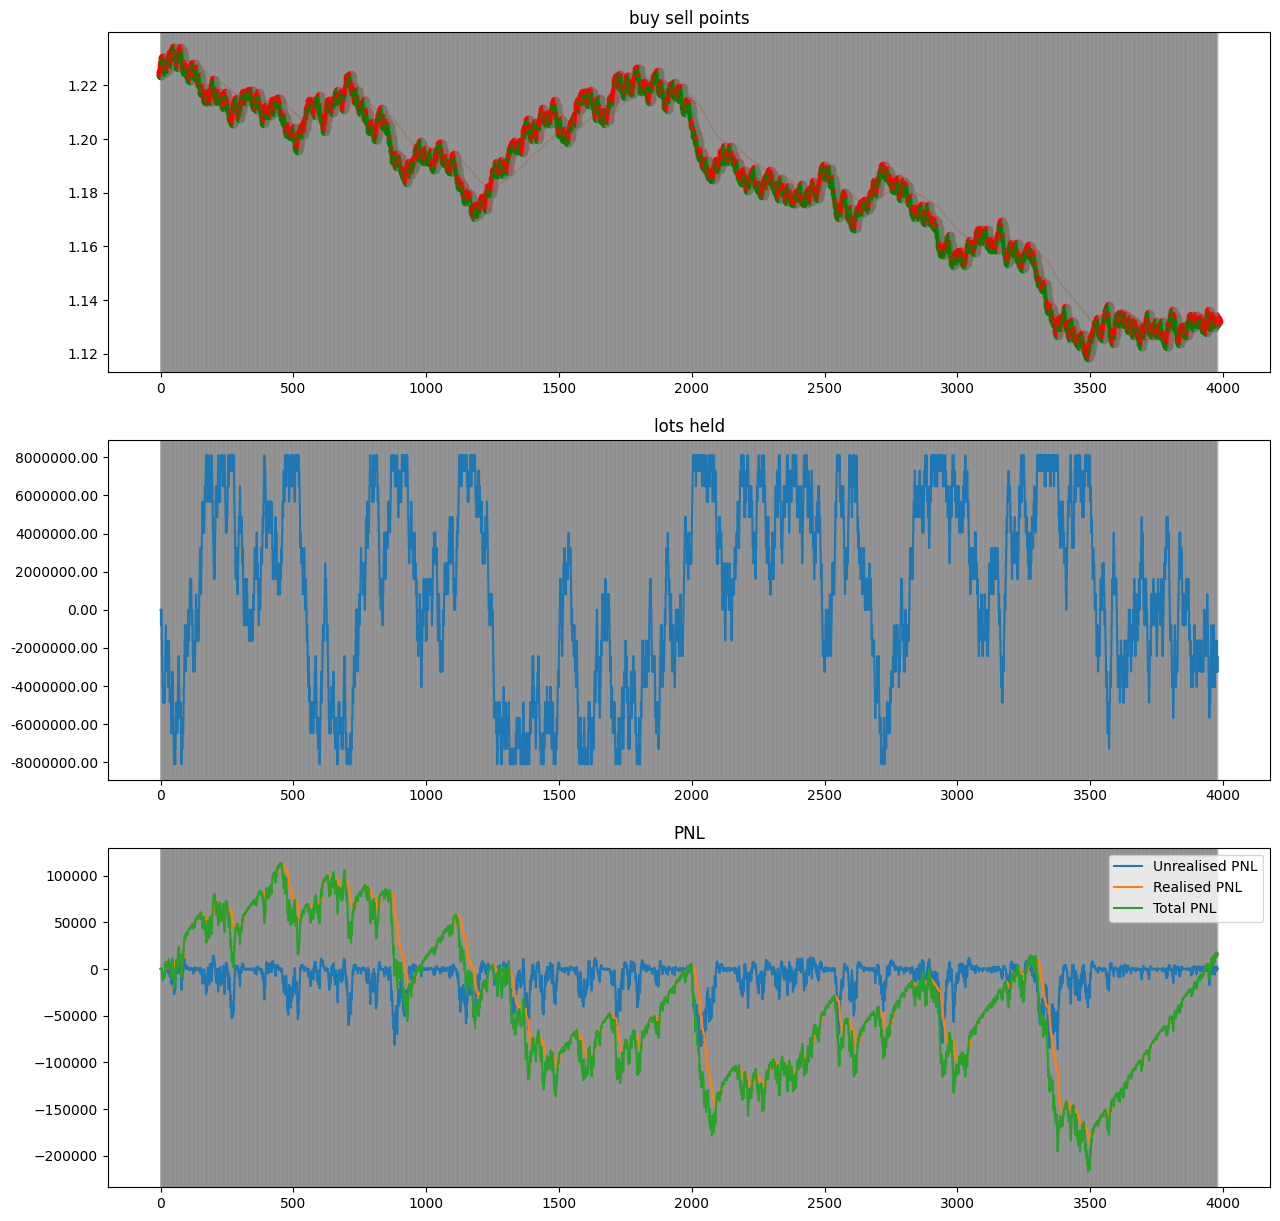

In [ ]:
_,_,_,_,_ = run_strategy_eval(tick_data,optimal_G,optimal_n,trade_plot=True)

In [ ]:
import optuna

time1 = time.time()

def objective_optuna(trial, tick_data):
    G = trial.suggest_int("G", 1, 10)*0.001
    n = trial.suggest_int("n", 1, 100)*10000
    d = trial.suggest_int("d", 2, 15)
    
    max_loss,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,G,n,d)
    
    # Constraints
    if max_position > 10e6:
        return float('inf')
    if U_PNL < -150e3:
        return float('inf')
    if max_loss < -500e3:
        return float('inf')
    return -R_PNL  # We negate the value since we want to maximize Profit

study = optuna.create_study(direction="minimize")
study.optimize(lambda trial: objective_optuna(trial, tick_data), n_trials=100)

optimal_G = study.best_params["G"]*0.001
optimal_n = study.best_params["n"]*10000
optimal_d = study.best_params["d"]

time2 = time.time()
print(time2-time1)

[I 2023-09-29 10:14:18,799] A new study created in memory with name: no-name-ba2f048b-e7cb-4b6c-876a-4c2c38c221bd
[I 2023-09-29 10:14:18,875] Trial 0 finished with value: -24000.0 and parameters: {'G': 2, 'n': 100, 'd': 2}. Best is trial 0 with value: -24000.0.
[I 2023-09-29 10:14:18,927] Trial 1 finished with value: 22827.9999 and parameters: {'G': 4, 'n': 26, 'd': 4}. Best is trial 0 with value: -24000.0.
[I 2023-09-29 10:14:19,077] Trial 2 finished with value: 54624.0003 and parameters: {'G': 1, 'n': 48, 'd': 14}. Best is trial 0 with value: -24000.0.
[I 2023-09-29 10:14:19,128] Trial 3 finished with value: inf and parameters: {'G': 5, 'n': 58, 'd': 8}. Best is trial 0 with value: -24000.0.
[I 2023-09-29 10:14:19,175] Trial 4 finished with value: 10394.7934 and parameters: {'G': 7, 'n': 18, 'd': 5}. Best is trial 0 with value: -24000.0.
[I 2023-09-29 10:14:19,225] Trial 5 finished with value: inf and parameters: {'G': 7, 'n': 49, 'd': 8}. Best is trial 0 with value: -24000.0.
[I 202

11.442621946334839


In [ ]:
optimal_G, optimal_n,optimal_d, - study.best_value

(0.001, 970000, 7, 136769.9996)

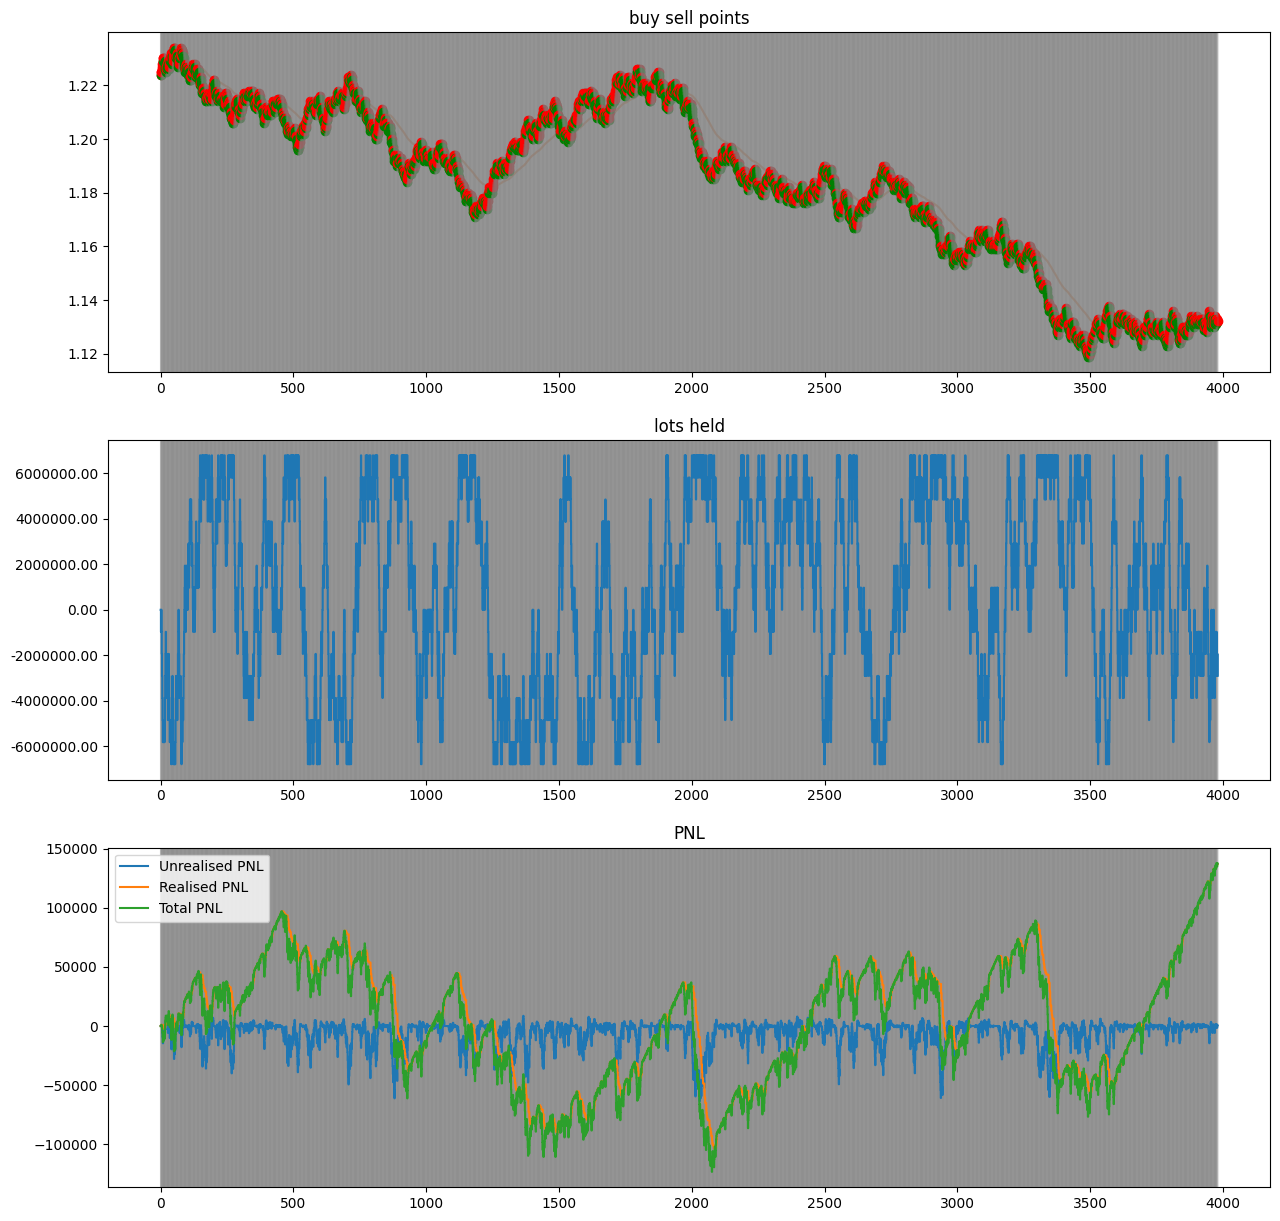

In [ ]:
_,_,_,_,_  = run_strategy_eval(tick_data,optimal_G,optimal_n,optimal_d,trade_plot=True)

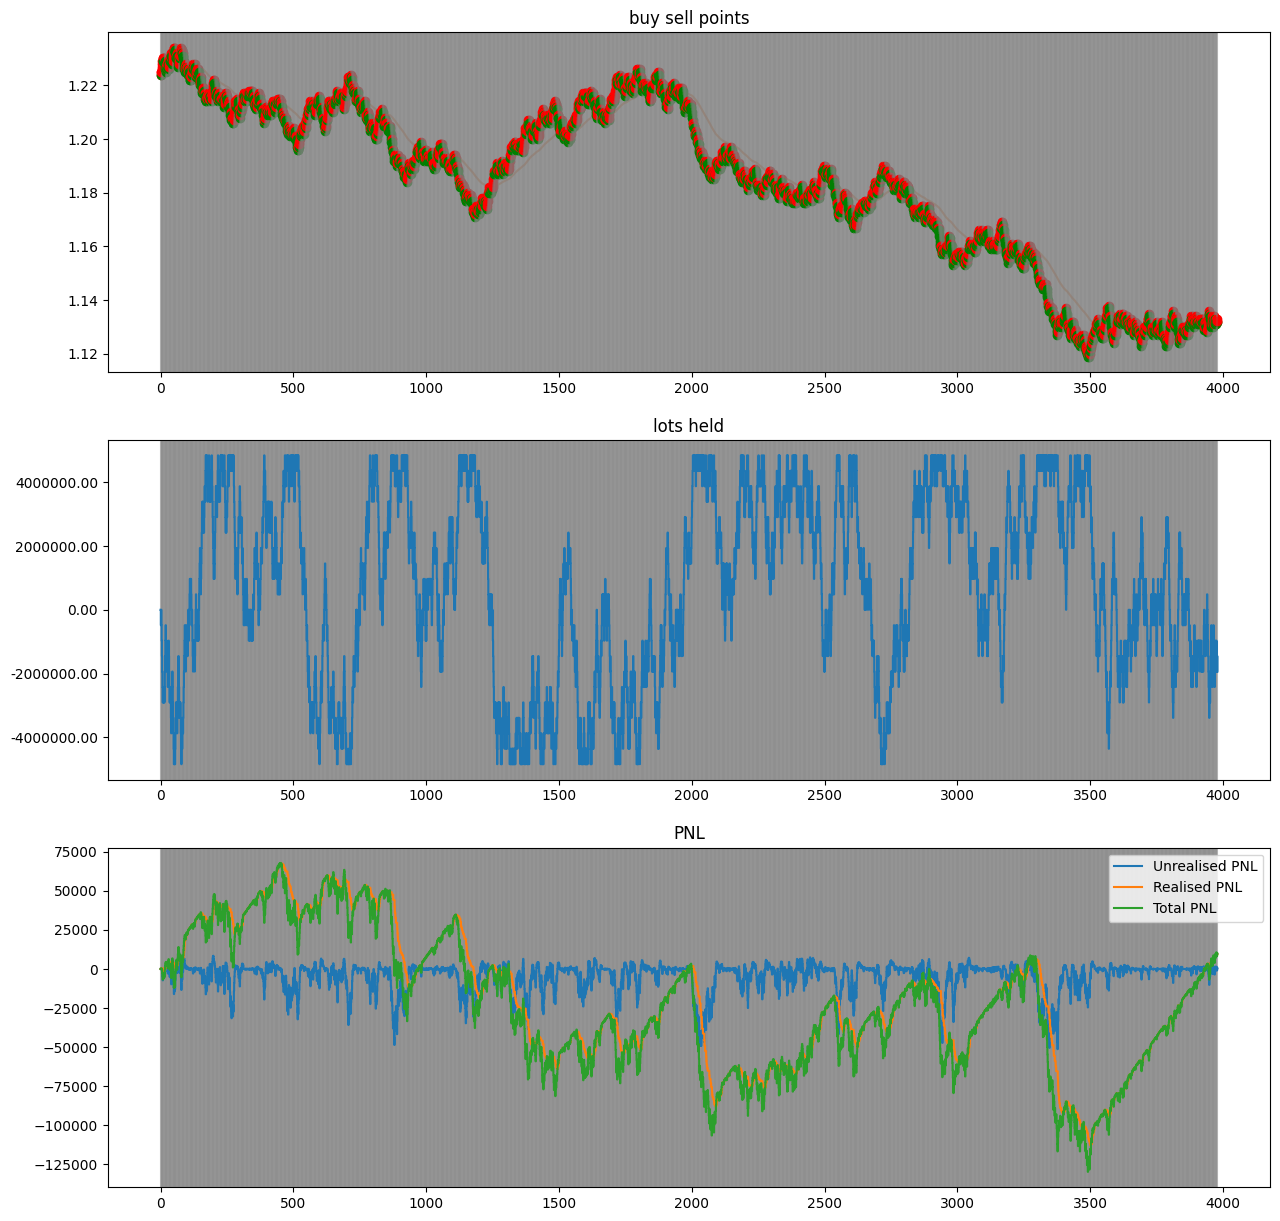

In [ ]:
tick_data = data_gather_from_files('1 jan 2021','31 dec 2021')['EURUSD.mid']
_,_,_,_,_  = run_strategy_eval(tick_data,0.001,484314,10,trade_plot=True)

## Grid based search

In [93]:
ladder_sizing_grid = np.arange(0.001,0.01,0.0005)
print(ladder_sizing_grid)
lot_sizing_grid = np.arange(100000,2000000,100000)
print(lot_sizing_grid)
ladder_depth_grid = np.arange(3,15,1)
print(ladder_depth_grid)

[0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045 0.005  0.0055
 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095]
[ 100000  200000  300000  400000  500000  600000  700000  800000  900000
 1000000 1100000 1200000 1300000 1400000 1500000 1600000 1700000 1800000
 1900000]
[ 3  4  5  6  7  8  9 10 11 12 13 14]


In [94]:
# heat map of profits for different ladder sizing and position sizing

def profit_map(tick_data, ladder_sizing, position_sizing,ladder_depth):
    n_ladders = len(ladder_sizing)
    n_positions = len(position_sizing)
    profits = np.zeros((n_ladders, n_positions))
    # Initialize tqdm progress bar
    pbar = tqdm(total=n_ladders * n_positions)
    max_profit = -np.inf
    optimal_G = 0
    optimal_n = 0
    for i in range(n_ladders):
        for j in range(n_positions):
            max_loss, min_U_PNL, max_position, R_PNL,_ = run_strategy_optimised(tick_data, ladder_sizing[i], position_sizing[j],ladder_depth=ladder_depth)
            if (min_U_PNL > -150000) and (max_position < 10000000) and (max_loss > -500000):
                # Update the progress bar
                pbar.update(1)
                profits[i, j] = R_PNL
                if R_PNL > max_profit:
                    max_profit = R_PNL
                    optimal_G = ladder_sizing[i]
                    optimal_n = position_sizing[j]
            else:
                # Update the progress bar
                pbar.update(1)
                profits[i, j] = np.nan
    # Close the progress bar
    pbar.close()
    
    return profits,optimal_G,optimal_n,max_profit


def profit_heat_map(profits, ladder_sizing, position_sizing):
    plt.figure(figsize=(20,15))
    
    # Create the heatmap without annotations
    ax = sns.heatmap(profits, cbar=True,alpha=0.7)
    
    # Manually add annotations shifted by the desired amount
    for i in range(len(ladder_sizing)):
        for j in range(len(position_sizing)):
            ax.text(j+0.5, i+0.5, f"{profits[i, j]:.2f}", 
                    ha='center', va='center', color='black', fontsize=10)
    
    plt.xticks(np.arange(len(position_sizing)) + 0.5, position_sizing)
    plt.yticks(np.arange(len(ladder_sizing)) + 0.5, ladder_sizing)
    plt.xlabel('Position Sizing')
    plt.ylabel('Ladder Sizing')
    plt.title('Realised Profit Heat Map')
    plt.show()


In [99]:
time1 = time.time()
profits,optimal_g,optimal_n,max_profit = profit_map(tick_data,ladder_sizing_grid,lot_sizing_grid,10)
time2 = time.time()
print('time taken is: ',time2-time1)





































































































































































































































































































































































































































































































































































































100%|██████████| 342/342 [00:19<00:00, 17.53it/s]

time taken is:  19.51008915901184


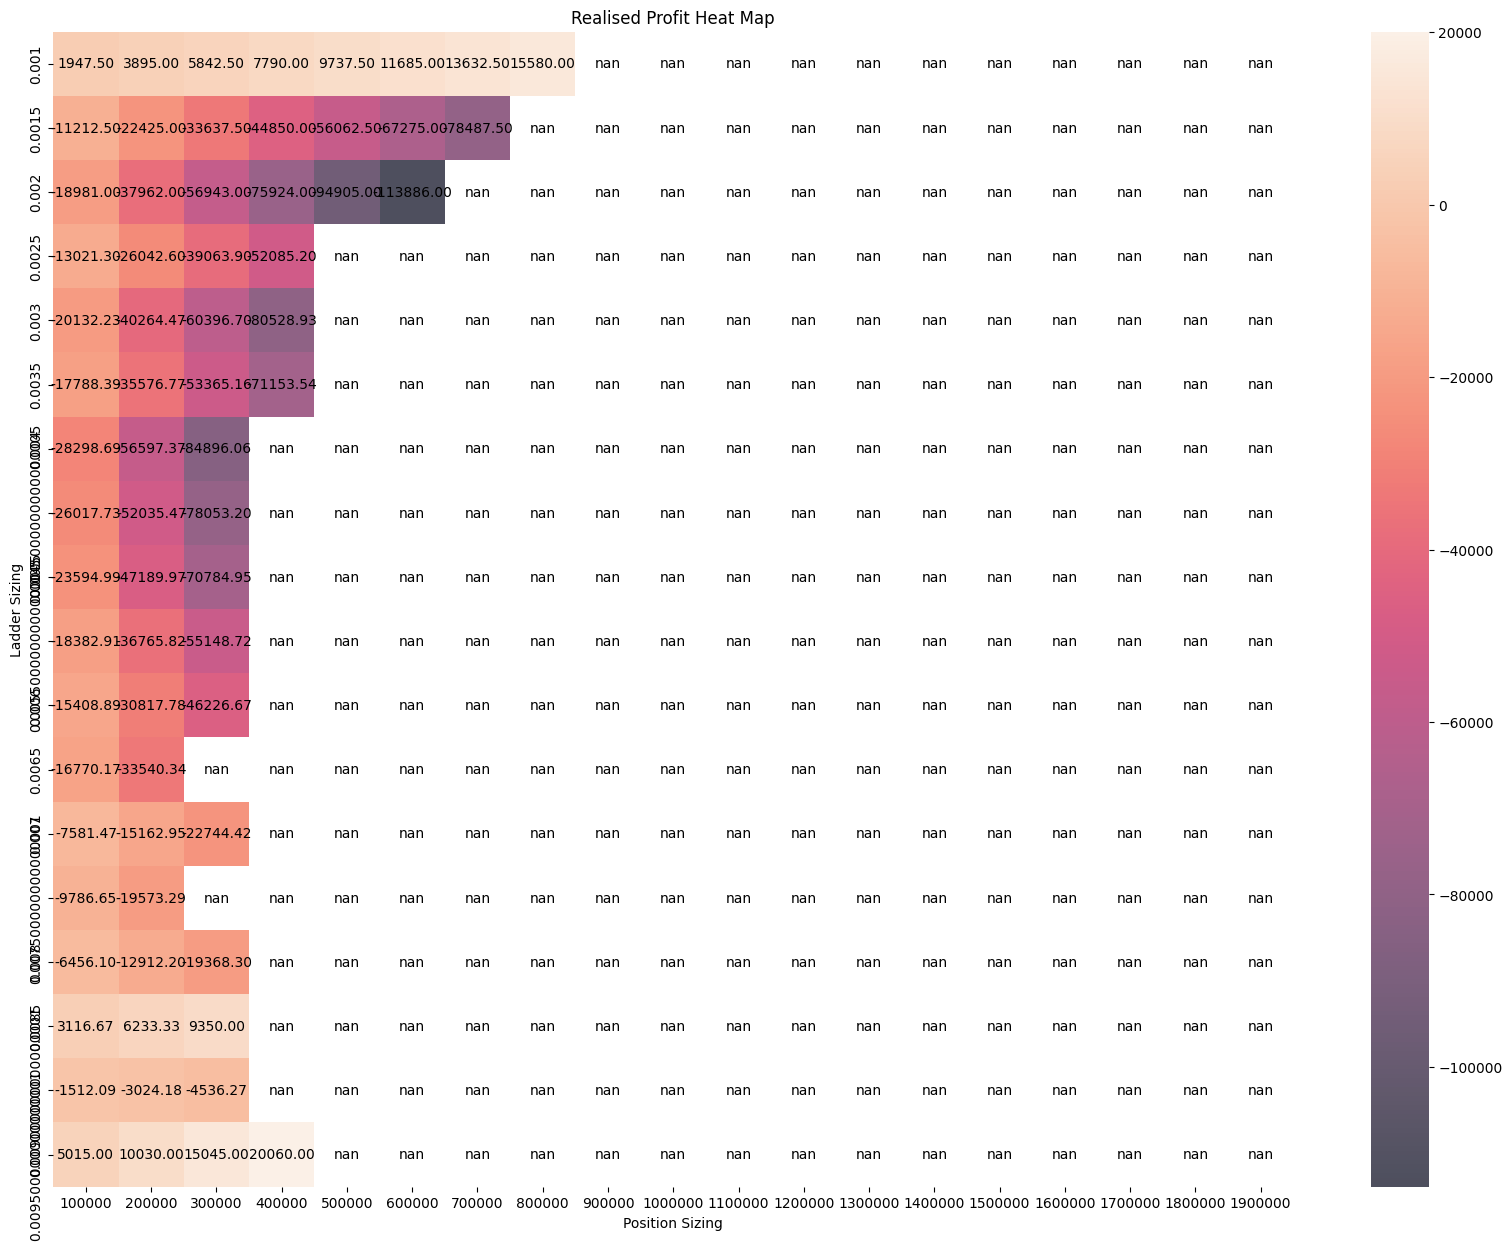

In [100]:
profit_heat_map(profits,ladder_sizing_grid,lot_sizing_grid)

In [101]:
optimal_g,optimal_n,max_profit

(0.009500000000000001, 400000, 20060.0)

In [102]:
max_loss, U_PNL, max_position, R_PNL = run_strategy_optimised(tick_data, optimal_g,optimal_n)
print(max_loss, U_PNL, max_position, R_PNL)

-106400.0 -147725.0 4484000.0 20060.0


In [103]:
# run_strategy_eval(tick_data, 0.005, 400000,trade_plot=True)

## Walk forward Analysis

In [207]:
def error_check(params,n):
    if len(params) != n:
        raise IndexError('The number of parameters is not correct')

In [208]:
def Grid_Search_3(tick_data,parameters,optimization_params=[]):
    
    error_check(parameters,3)
    
    grid_params = parameters[0]
    position_params = parameters[1]
    depth_params = parameters[2]
    
    ladder_sizing_grid = np.arange(grid_params[0],grid_params[1],grid_params[2])
    lot_sizing_grid = np.arange(position_params[0],position_params[1],position_params[2])
    ladder_depth_grid = np.arange(depth_params[0],depth_params[1],depth_params[2])
    
    n_ladders = len(ladder_sizing_grid)
    n_positions = len(lot_sizing_grid)
    n_depth = len(ladder_depth_grid)

    max_profit = -np.inf
    optimal_G = 0
    optimal_n = 0
    optimal_d = 0
    for i in range(n_ladders):
        for j in range(n_depth):
            for k in range(n_positions):
                
                max_loss, min_U_PNL, max_position, R_PNL, profit = run_strategy_optimised(tick_data, ladder_sizing_grid[i], lot_sizing_grid[k],ladder_depth=ladder_depth_grid[j])
                if (min_U_PNL > -150000) and (max_position < 10000000) and (max_loss > -500000):
                    if profit > max_profit:
                        max_profit = profit
                        optimal_G = ladder_sizing_grid[i]
                        optimal_n = lot_sizing_grid[k]
                        optimal_d = ladder_depth_grid[j]
                else:
                    break
    
    return optimal_G,optimal_n,optimal_d,max_profit

In [209]:
optimal_G,optimal_n,optimal_d,max_profit = Grid_Search_3(tick_data,parameters=[(0.001,0.01,0.0005),(100000,2000000,100000),(3,15,1)])

ValueError: not enough values to unpack (expected 5, got 4)

In [106]:
optimal_G,optimal_n,optimal_d,max_profit

(0.0015, 1900000, 4, 216784.06)

In [107]:
run_strategy_optimised(tick_data,optimal_G,optimal_n,optimal_d)

(-142500.0, -94584.375, 9382200.0, 216784.06)

In [191]:
def optuna_optimiser_3(tick_data,parameters,optimization_params):
    n_trials = optimization_params[0]

    error_check(parameters,3)
    
    grid_params = parameters[0]
    position_params = parameters[1]
    depth_params = parameters[2]
    
    def objective_optuna(trial, tick_data):
        G = trial.suggest_int("G", grid_params[0]/grid_params[2], grid_params[1]/grid_params[2])*grid_params[2]
        n = trial.suggest_int("n", position_params[0]/position_params[2], position_params[1]/position_params[2])*position_params[2]
        d = trial.suggest_int("d", depth_params[0], depth_params[1])
        
        max_loss,U_PNL,max_position,R_PNL,profit = run_strategy_optimised(tick_data,G,n,d)
        
        # Constraints
        if max_position > 10e6:
            return float('inf')
        if U_PNL <-150e3:
            return float('inf')
        if max_loss < -500e3:
            return float('inf')
        return -profit # We negate the value since we want to maximize Profit

    study = optuna.create_study(direction="minimize")
    study.optimize(lambda trial: objective_optuna(trial, tick_data), n_trials=n_trials)
    
    optimal_g = study.best_params["G"]*grid_params[2]
    optimal_n = study.best_params["n"]*position_params[2]
    optimal_d = study.best_params["d"]
    
    return optimal_g,optimal_n,optimal_d, - study.best_value

In [198]:
def generate_date_ranges_for_walk_forward(start_month_year, end_month_year, day=15, n_months = 1):
    # Initialize an empty list to store the date ranges
    date_ranges = []
    if day not in range(1, 29):
        raise ValueError('Day must be between 1 and 28')
    # Convert the input strings to datetime objects, using the given day
    start_date = datetime.strptime(f"{day} {start_month_year}", '%d %b %Y')
    end_date = datetime.strptime(f"{day} {end_month_year}", '%d %b %Y')
    
    # Generate the date ranges
    current_date = start_date
    while current_date <= end_date:
        next_date = current_date + relativedelta(months=n_months)
        date_range = [current_date.strftime('%d %b %Y'), (next_date - relativedelta(days=1)).strftime('%d %b %Y')]
        date_ranges.append(date_range)
        current_date = next_date
    
    return date_ranges[:-1]


In [182]:
def get_previous_n_months(end_date_str, n_months):
    # Convert the input string to a datetime object
    end_date = datetime.strptime(end_date_str, '%d %b %Y')
    
    # Calculate the start date
    start_date = end_date - relativedelta(months=n_months)
    
    # Create the date range
    date_range = [start_date.strftime('%d %b %Y'), (end_date - relativedelta(days=1)).strftime('%d %b %Y')]
    
    return date_range


In [199]:
generate_date_ranges_for_walk_forward('jan 2021', 'jan 2022', day=15, n_months = 3)

[['15 Jan 2021', '14 Apr 2021'],
 ['15 Apr 2021', '14 Jul 2021'],
 ['15 Jul 2021', '14 Oct 2021'],
 ['15 Oct 2021', '14 Jan 2022']]

In [204]:
def walk_forward_analysis(evaluation_start, evaluation_end, evaluation_day,parameters,optimization_function = Grid_Search_3, optimizer_params =[],  lookback_in_months = 6,evaluation_period = 3):
    generated_date_ranges = generate_date_ranges_for_walk_forward(evaluation_start, evaluation_end,evaluation_day,n_months = evaluation_period)
    df = {}
    for dates in generated_date_ranges:
        train_period = get_previous_n_months(dates[0], lookback_in_months)
        train_data = data_gather_from_files(train_period[0],train_period[1])['EURUSD.mid']
        print('Data gathered for training period: ',train_period[0],train_period[1])
        g,n,d,_ = optimization_function(train_data,parameters,optimizer_params)
        print('Optimal parameters for training period: ',g,n,d)
        test_data = data_gather_from_files(dates[0],dates[1])['EURUSD.mid']
        print('Data gathered for testing period: ',dates[0],dates[1])
        max_loss, U_PNL, max_position, R_PNL = run_strategy_optimised(test_data, g,n,d)
        print('Realised profit for testing period: ',R_PNL)
        print('******************************************************************************************************')
        df[dates[0]+'-'+dates[1]] = [g,n,d,max_loss, U_PNL, max_position, R_PNL]
    df = pd.DataFrame(df).T
    df.columns = ['G','n','d','max_loss', 'U_PNL', 'max_position', 'R_PNL']
    return df

In [201]:
grid_params = [0.001,0.01,0.0005]
lot_params = [100000,2000000,100000]
depth_params = [3,12,1]

parameters = [grid_params,lot_params,depth_params]

In [202]:
results = walk_forward_analysis('jan 2021','jan 2022',15,parameters,optimization_function=optuna_optimiser_3,optimizer_params=[200],lookback_in_months=6,evaluation_period=3)

[I 2023-10-03 10:22:39,011] A new study created in memory with name: no-name-bdeacf7b-0f36-41e2-9a58-712acaaf6155
[I 2023-10-03 10:22:39,073] Trial 0 finished with value: -63163.4169 and parameters: {'G': 8, 'n': 14, 'd': 5}. Best is trial 0 with value: -63163.4169.
[I 2023-10-03 10:22:39,126] Trial 1 finished with value: inf and parameters: {'G': 11, 'n': 18, 'd': 7}. Best is trial 0 with value: -63163.4169.
[I 2023-10-03 10:22:39,180] Trial 2 finished with value: inf and parameters: {'G': 12, 'n': 11, 'd': 5}. Best is trial 0 with value: -63163.4169.


Data gathered for training period:  15 Jul 2020 14 Jan 2021


[I 2023-10-03 10:22:39,234] Trial 3 finished with value: -92339.9999 and parameters: {'G': 7, 'n': 12, 'd': 3}. Best is trial 3 with value: -92339.9999.
[I 2023-10-03 10:22:39,302] Trial 4 finished with value: -128160.0001 and parameters: {'G': 4, 'n': 18, 'd': 4}. Best is trial 4 with value: -128160.0001.
[I 2023-10-03 10:22:39,429] Trial 5 finished with value: 31979.9996 and parameters: {'G': 2, 'n': 6, 'd': 4}. Best is trial 4 with value: -128160.0001.
[I 2023-10-03 10:22:39,475] Trial 6 finished with value: inf and parameters: {'G': 9, 'n': 15, 'd': 5}. Best is trial 4 with value: -128160.0001.
[I 2023-10-03 10:22:39,519] Trial 7 finished with value: inf and parameters: {'G': 11, 'n': 13, 'd': 6}. Best is trial 4 with value: -128160.0001.
[I 2023-10-03 10:22:39,562] Trial 8 finished with value: inf and parameters: {'G': 19, 'n': 8, 'd': 10}. Best is trial 4 with value: -128160.0001.
[I 2023-10-03 10:22:39,608] Trial 9 finished with value: -63163.4169 and parameters: {'G': 8, 'n': 1

Optimal parameters for training period:  0.005 2000000 3
Data gathered for testing period:  15 Jan 2021 14 Apr 2021
Realised profit for testing period:  -9999.9999
******************************************************************************************************


[I 2023-10-03 10:22:51,945] A new study created in memory with name: no-name-c444843e-2195-4ee7-894e-c6a3efed7606
[I 2023-10-03 10:22:51,978] Trial 0 finished with value: -96000.0 and parameters: {'G': 20, 'n': 12, 'd': 4}. Best is trial 0 with value: -96000.0.
[I 2023-10-03 10:22:52,014] Trial 1 finished with value: inf and parameters: {'G': 9, 'n': 15, 'd': 9}. Best is trial 0 with value: -96000.0.
[I 2023-10-03 10:22:52,049] Trial 2 finished with value: -69750.0001 and parameters: {'G': 9, 'n': 5, 'd': 10}. Best is trial 0 with value: -96000.0.
[I 2023-10-03 10:22:52,090] Trial 3 finished with value: -11943.7498 and parameters: {'G': 6, 'n': 13, 'd': 4}. Best is trial 0 with value: -96000.0.
[I 2023-10-03 10:22:52,122] Trial 4 finished with value: -111210.6629 and parameters: {'G': 15, 'n': 7, 'd': 9}. Best is trial 4 with value: -111210.6629.


Data gathered for training period:  15 Oct 2020 14 Apr 2021


[I 2023-10-03 10:22:52,174] Trial 5 finished with value: -9889.9995 and parameters: {'G': 4, 'n': 8, 'd': 5}. Best is trial 4 with value: -111210.6629.
[I 2023-10-03 10:22:52,223] Trial 6 finished with value: -12799.9997 and parameters: {'G': 4, 'n': 6, 'd': 4}. Best is trial 4 with value: -111210.6629.
[I 2023-10-03 10:22:52,266] Trial 7 finished with value: -1750.0001 and parameters: {'G': 5, 'n': 1, 'd': 6}. Best is trial 4 with value: -111210.6629.
[I 2023-10-03 10:22:52,300] Trial 8 finished with value: inf and parameters: {'G': 10, 'n': 20, 'd': 8}. Best is trial 4 with value: -111210.6629.
[I 2023-10-03 10:22:52,334] Trial 9 finished with value: -233999.9999 and parameters: {'G': 18, 'n': 13, 'd': 9}. Best is trial 9 with value: -233999.9999.
[I 2023-10-03 10:22:52,376] Trial 10 finished with value: inf and parameters: {'G': 20, 'n': 17, 'd': 12}. Best is trial 9 with value: -233999.9999.
[I 2023-10-03 10:22:52,420] Trial 11 finished with value: -183600.0 and parameters: {'G': 1

Optimal parameters for training period:  0.0085 1300000 7
Data gathered for testing period:  15 Apr 2021 14 Jul 2021
Realised profit for testing period:  66300.0
******************************************************************************************************
Data gathered for training period:  15 Jan 2021 14 Jul 2021


[I 2023-10-03 10:23:01,627] Trial 3 finished with value: inf and parameters: {'G': 14, 'n': 17, 'd': 9}. Best is trial 0 with value: -201875.0001.
[I 2023-10-03 10:23:01,702] Trial 4 finished with value: 109290.1774 and parameters: {'G': 2, 'n': 6, 'd': 11}. Best is trial 0 with value: -201875.0001.
[I 2023-10-03 10:23:01,728] Trial 5 finished with value: inf and parameters: {'G': 9, 'n': 16, 'd': 11}. Best is trial 0 with value: -201875.0001.
[I 2023-10-03 10:23:01,805] Trial 6 finished with value: inf and parameters: {'G': 2, 'n': 19, 'd': 9}. Best is trial 0 with value: -201875.0001.
[I 2023-10-03 10:23:01,830] Trial 7 finished with value: -119448.0 and parameters: {'G': 12, 'n': 7, 'd': 9}. Best is trial 0 with value: -201875.0001.
[I 2023-10-03 10:23:01,907] Trial 8 finished with value: 80775.0007 and parameters: {'G': 2, 'n': 9, 'd': 4}. Best is trial 0 with value: -201875.0001.
[I 2023-10-03 10:23:01,933] Trial 9 finished with value: inf and parameters: {'G': 11, 'n': 16, 'd': 1

Optimal parameters for training period:  0.0085 2000000 5
Data gathered for testing period:  15 Jul 2021 14 Oct 2021
Realised profit for testing period:  32900.0
******************************************************************************************************
Data gathered for training period:  15 Apr 2021 14 Oct 2021


[I 2023-10-03 10:23:09,480] Trial 2 finished with value: -13177.9998 and parameters: {'G': 5, 'n': 11, 'd': 5}. Best is trial 1 with value: -87685.0.
[I 2023-10-03 10:23:09,500] Trial 3 finished with value: -105000.0 and parameters: {'G': 20, 'n': 15, 'd': 9}. Best is trial 3 with value: -105000.0.
[I 2023-10-03 10:23:09,531] Trial 4 finished with value: -70890.0004 and parameters: {'G': 4, 'n': 17, 'd': 3}. Best is trial 3 with value: -105000.0.
[I 2023-10-03 10:23:09,561] Trial 5 finished with value: inf and parameters: {'G': 4, 'n': 20, 'd': 5}. Best is trial 3 with value: -105000.0.
[I 2023-10-03 10:23:09,588] Trial 6 finished with value: -27763.0081 and parameters: {'G': 5, 'n': 19, 'd': 4}. Best is trial 3 with value: -105000.0.
[I 2023-10-03 10:23:09,609] Trial 7 finished with value: -70800.0 and parameters: {'G': 16, 'n': 9, 'd': 7}. Best is trial 3 with value: -105000.0.
[I 2023-10-03 10:23:09,630] Trial 8 finished with value: -21916.6667 and parameters: {'G': 10, 'n': 2, 'd':

Optimal parameters for training period:  0.0075 2000000 4
Data gathered for testing period:  15 Oct 2021 14 Jan 2022
Realised profit for testing period:  82119.1407
******************************************************************************************************


In [193]:
results

,G,n,d,max_loss,U_PNL,max_position,R_PNL
15 Jan 2021-14 Apr 2021,0.0025,1700000.0,4.0,-85000.0,-99875.000,8313000.0,-28333.3333
15 Apr 2021-14 Jul 2021,0.0085,1300000.0,9.0,-55250.0,-55250.000,6364800.0,66300.0000
15 Jul 2021-14 Oct 2021,0.0085,2000000.0,5.0,-51000.0,-102000.000,9248000.0,32900.0000
15 Oct 2021-14 Jan 2022,0.0060,1500000.0,5.0,-153000.0,-149400.000,8505000.0,3716.1914
15 Jan 2022-14 Apr 2022,0.0015,1600000.0,5.0,-312000.0,-137656.045,9192000.0,-232799.9994


In [205]:
results1 = walk_forward_analysis('jan 2021','jan 2022',15,parameters,optimization_function=Grid_Search_3,lookback_in_months=6,evaluation_period=3)

Data gathered for training period:  15 Jul 2020 14 Jan 2021
Optimal parameters for training period:  0.0025 1900000 4
Data gathered for testing period:  15 Jan 2021 14 Apr 2021
Realised profit for testing period:  -31666.6667
******************************************************************************************************
Data gathered for training period:  15 Oct 2020 14 Apr 2021
Optimal parameters for training period:  0.0085 1300000 6
Data gathered for testing period:  15 Apr 2021 14 Jul 2021
Realised profit for testing period:  66300.0
******************************************************************************************************
Data gathered for training period:  15 Jan 2021 14 Jul 2021
Optimal parameters for training period:  0.0085 1900000 4
Data gathered for testing period:  15 Jul 2021 14 Oct 2021
Realised profit for testing period:  31255.0
******************************************************************************************************
Data gathered for tra

In [206]:
results1

,G,n,d,max_loss,U_PNL,max_position,R_PNL
15 Jan 2021-14 Apr 2021,0.0025,1900000.0,4.0,-95000.0,-111625.0,9291000.0,-31666.6667
15 Apr 2021-14 Jul 2021,0.0085,1300000.0,6.0,-55250.0,-55250.0,6364800.0,66300.0000
15 Jul 2021-14 Oct 2021,0.0085,1900000.0,4.0,-48450.0,-96900.0,8785600.0,31255.0000
15 Oct 2021-14 Jan 2022,0.0060,1600000.0,5.0,-163200.0,-159360.0,9072000.0,3963.9375


## attempt to parallelise

In [18]:
# generate all combinations of parameters
def generate_pairs(ladder_sizing_grid,lot_sizing_grid):
    pairs = []
    for i in range(len(ladder_sizing_grid)):
        for j in range(len(lot_sizing_grid)):
            pairs.append([ladder_sizing_grid[i],lot_sizing_grid[j]])
    return pairs

In [19]:
pairs = generate_pairs(ladder_sizing_grid,lot_sizing_grid)

In [20]:
from concurrent.futures import ThreadPoolExecutor
def my_function(pairs):
    return run_strategy_optimised(tick_data,pairs[0],pairs[1])
time1 = time.time()
with ThreadPoolExecutor() as executor:
    results = list(executor.map(my_function, pairs))
time2 = time.time()
print("Time taken:", time2-time1)

KeyboardInterrupt: 

In [ ]:
time1 = time.time()
for pair in pairs:
    run_strategy_optimised(tick_data,pair[0],pair[1])
time2 = time.time()
print("Time taken:", time2-time1)

Time taken: 210.39456486701965


In [ ]:
time1 = time.time()
results = [run_strategy_optimised(tick_data,pair[0],pair[1]) for pair in pairs]
time2 = time.time()
print("Time taken:", time2-time1)

Time taken: 210.57003211975098


In [ ]:
from concurrent.futures import ProcessPoolExecutor

def my_function(pairs):
    return run_strategy_optimised(tick_data,pairs[0],pairs[1])
time1 = time.time()
with ProcessPoolExecutor() as executor:
    results = list(executor.map(my_function, pairs))
time2 = time.time()
print("Time taken:", time2-time1)

Process SpawnProcess-3:
Process SpawnProcess-4:
Process SpawnProcess-5:
Process SpawnProcess-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process SpawnProcess-2:
  File "/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/concurrent/futures/process.py", line 244, in _process_worker
    call_item = call_queue.get(block=True)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/multiprocessing/queues.py", line 122, in get
    return _ForkingPickler.loads(res)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get at

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [ ]:
from multiprocessing import Pool

def my_function(pairs):
    return run_strategy_optimised(tick_data,pairs[0],pairs[1])

time1 = time.time()
    with Pool() as p:
        results = p.map(my_function, pairs)
time2 = time.time()
print("Time taken:", time2-time1)

In [ ]:
from joblib import Parallel, delayed

def my_function(pairs):
    return run_strategy_optimised(tick_data,pairs[0],pairs[1])

results = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in values_to_process)
print("Results:", results)


In [ ]:
import dask

@dask.delayed
def my_function(x):
    return x * x

values_to_process = [1, 2, 3, 4, 5]
tasks = [my_function(i) for i in values_to_process]
results = dask.compute(*tasks)
print("Results:", results)


## SVM boundary approximation

In [ ]:
from sklearn import svm

In [ ]:
def get_random_points(ranges,number_of_points):
    # Create a grid of all possible combinations
    mesh = np.meshgrid(*ranges)

    # Flatten the grid to a list of all combinations
    # Use np.stack to stack the arrays along a new axis, and then reshape
    all_combinations = np.stack(mesh, axis=-1).reshape(-1, len(ranges))

    # Number of points to pick at random
    x = number_of_points

    # Randomly select x points
    random_indices = np.random.choice(all_combinations.shape[0], number_of_points, replace=False)
    random_points = all_combinations[random_indices]
    return random_points

In [ ]:
test_points = get_random_points([ladder_sizing_grid,lot_sizing_grid],20)
Data = pd.DataFrame(test_points,columns=['ladder_sizing','lot_sizing'])
for row in Data.itertuples():
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,row.ladder_sizing,row.lot_sizing)
    if (U_PNL > -150000) and (max_position < 1000000) and (profit > -500000):
        Data.loc[row.Index,'R_PNL'] = R_PNL
        Data.loc[row.Index,'feasible'] = 1
    else:
        Data.loc[row.Index,'R_PNL'] = np.nan
        Data.loc[row.Index,'feasible'] = 0

ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
Data

,ladder_sizing,lot_sizing,R_PNL,feasible
0,0.01,"400,000.00","11,275.00",1.00
1,0.00,"1,000,000.00",NaN,0.00
2,0.00,"950,000.00",NaN,0.00
3,0.00,"500,000.00",NaN,0.00
4,0.00,"800,000.00",NaN,0.00
5,0.01,"250,000.00","4,350.00",1.00
6,0.01,"1,050,000.00",NaN,0.00
7,0.00,"650,000.00",NaN,0.00
8,0.00,"600,000.00",NaN,0.00
9,0.00,"200,000.00",NaN,0.00


In [ ]:
def scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [ ]:
X = Data[['ladder_sizing','lot_sizing']]
y = Data['feasible']

X_scaled = scale(X)
# Train SVM
clf = svm.SVC(kernel='linear', gamma=0.1)
clf.fit(X, y)


ValueError: Input y contains NaN.

In [ ]:
def remove_duplicate_trials(test_points,new_points):
    for i in new_points:
        for j in test_points:
            if (i[0] == j[0]) and (i[1] == j[1]):
                new_points.remove(i)


In [ ]:
new_test_points = get_random_points([ladder_sizing_grid,lot_sizing_grid],20)
remove_duplicate_trials(test_points,new_test_points)

In [ ]:
new_test_points = get_random_points([ladder_sizing_grid,lot_sizing_grid],10)
# check if these points are in data and then add to data
new_Data = pd.DataFrame(train_points,columns=['ladder_sizing','lot_sizing'])

for row in new_Data.itertuples():
    profit,U_PNL,max_position,R_PNL = run_strategy_optimised(tick_data,row.ladder_sizing,row.lot_sizing)
    if (U_PNL > -150000) and (max_position < 1000000) and (profit > -500000):
        new_Data.loc[row.Index,'R_PNL'] = R_PNL
        new_Data.loc[row.Index,'feasible'] = 1
    else:
        new_Data.loc[row.Index,'R_PNL'] = np.nan
        new_Data.loc[row.Index,'feasible'] = 0

In [ ]:
Data

,ladder_sizing,lot_sizing,R_PNL,feasible
0,0.01,"400,000.00","11,275.00",1.00
1,0.00,"1,000,000.00",NaN,0.00
2,0.00,"950,000.00",NaN,0.00
3,0.00,"500,000.00",NaN,0.00
4,0.00,"800,000.00",NaN,0.00
5,0.01,"250,000.00","4,350.00",1.00
6,0.01,"1,050,000.00",NaN,0.00
7,0.00,"650,000.00",NaN,0.00
8,0.00,"600,000.00",NaN,0.00
9,0.00,"200,000.00",NaN,0.00


In [ ]:

# Constrained Optimization Problem
def objective_function(params):
    G, n = params
    _,_,_,obj = run_strategy_optimised(tick_data,row.ladder_sizing,row.lot_sizing)
    return -obj  # negate because we want to maximize

def svm_constraint(params):
    G, n = params
    return clf.decision_function([[G, n]])[0]

initial_guess = [0.005, 500000]  # Initial guess for G and n
# Call Optimizer
result = scipy.optimize.minimize(
    objective_function,
    initial_guess,
    constraints={'type': 'ineq', 'fun': svm_constraint}
)

/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  

In [ ]:
result.x, -result.fun

(array([ 18874.49045041, 500000.        ]), 48822.4062)

In [ ]:
def plot_decision_boundary(Data, clf,ranges):
    # Extract the features and labels from Data
    X = Data[['ladder_sizing', 'lot_sizing']]
    y = Data['feasible']  # 1 if feasible, 0 if not
    
    # Create mesh grid
    xx, yy = np.meshgrid(np.linspace(ranges[0].min(), ranges[0].max(), 100),
                         np.linspace(ranges[1].min(),ranges[1].max(), 100))
    
    # Evaluate classifier on grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Check for the issue and fix it
    min_val = Z.min()
    max_val = Z.max()
    if min_val >= 0:
        levels = np.linspace(min_val, max_val, 7)
    else:
        levels = np.linspace(min_val, 0, 7)
    
    # Plot contours and decision boundary
    plt.contourf(xx, yy, Z, levels=levels, cmap=plt.cm.PuBu)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, max_val], colors='palevioletred')
    
    # Plot the training points
    plt.scatter(X['ladder_sizing'], X['lot_sizing'], c=y, cmap='coolwarm')
    
    plt.title('Decision Boundary')
    plt.xlabel('Ladder Sizing')
    plt.ylabel('Lot Sizing')
    plt.show()



/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


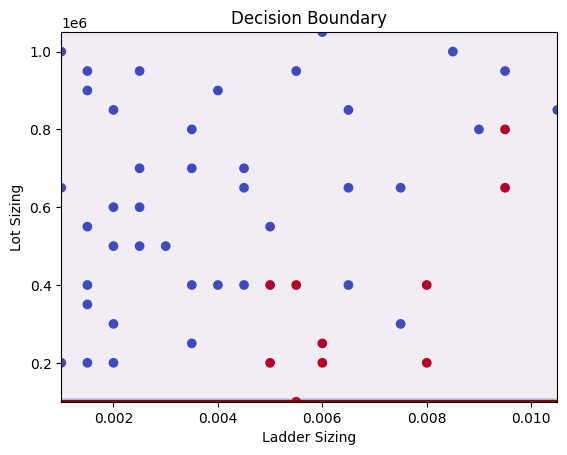

In [ ]:
plot_decision_boundary(Data, clf, [ladder_sizing_grid,lot_sizing_grid])

/Users/samanvayms/opt/anaconda3/envs/tradingenv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


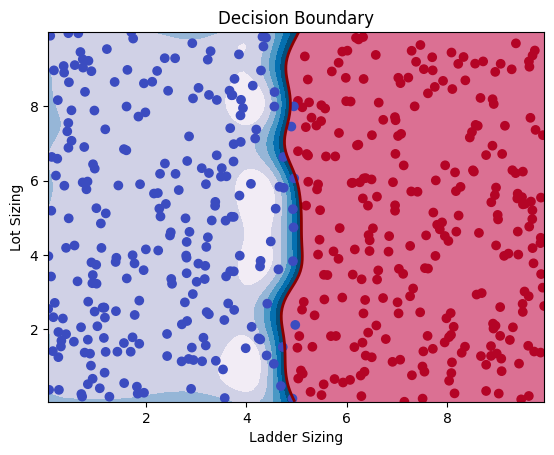

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm

# Generate example data
np.random.seed(42)
n = 500  # number of data points
ladder_sizing = np.random.uniform(0, 10, n)
lot_sizing = np.random.uniform(0, 10, n)

# Creating a DataFrame
Data = pd.DataFrame({
    'ladder_sizing': ladder_sizing,
    'lot_sizing': lot_sizing,
    'feasible': [1 if ls > 5 else 0 for ls in ladder_sizing]  # Simple rule for labeling
})

# Train SVM
X = Data[['ladder_sizing', 'lot_sizing']]
y = Data['feasible']
clf = svm.SVC(kernel='rbf', gamma=1)
clf.fit(X, y)

# Function to plot decision boundary
def plot_decision_boundary(Data, clf):
    # Extract features and labels from Data
    X = Data[['ladder_sizing', 'lot_sizing']]
    y = Data['feasible']
    
    # Create mesh grid
    xx, yy = np.meshgrid(np.linspace(X['ladder_sizing'].min(), X['ladder_sizing'].max(), 100),
                         np.linspace(X['lot_sizing'].min(), X['lot_sizing'].max(), 100))
    
    # Evaluate classifier on grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Check for the issue and fix it
    min_val = Z.min()
    max_val = Z.max()
    if min_val >= 0:
        levels = np.linspace(min_val, max_val, 7)
    else:
        levels = np.linspace(min_val, 0, 7)
    
    # Plot contours and decision boundary
    plt.contourf(xx, yy, Z, levels=levels, cmap=plt.cm.PuBu)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    plt.contourf(xx, yy, Z, levels=[0, max_val], colors='palevioletred')
    
    # Plot the training points
    plt.scatter(X['ladder_sizing'], X['lot_sizing'], c=y, cmap='coolwarm')
    
    plt.title('Decision Boundary')
    plt.xlabel('Ladder Sizing')
    plt.ylabel('Lot Sizing')
    plt.show()

# Use the function to plot the decision boundary
plot_decision_boundary(Data, clf)


In [ ]:
from concurrent.futures import ThreadPoolExecutor

def my_function(x):
    return x * x

values_to_process = np.arange(1000)
time1 = time.time()
with ThreadPoolExecutor() as executor:
    results = list(executor.map(my_function, values_to_process))
time2 = time.time()
print("Time taken:", time2-time1)


Time taken: 0.012643098831176758


In [ ]:
time1 = time.time()
for i in values_to_process:
    a = my_function(i)
time2 = time.time()
print("Time taken:", time2-time1)

Time taken: 0.00018787384033203125
